In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('deliveries.csv')
deli = pd.read_csv('matches.csv')

In [7]:
len(deli[deli['season'] < '2021'])

816

In [8]:
deli.groupby('city').size().sort_values(ascending=False)
# or another approach
#data['city'].value_counts()

city
Mumbai            173
Kolkata            93
Delhi              90
Chennai            85
Hyderabad          77
Bangalore          65
Chandigarh         61
Jaipur             57
Pune               51
Abu Dhabi          37
Ahmedabad          36
Bengaluru          29
Visakhapatnam      15
Durban             15
Lucknow            14
Dubai              13
Dharamsala         13
Centurion          12
Sharjah            10
Rajkot             10
Navi Mumbai         9
Indore              9
Johannesburg        8
Ranchi              7
Port Elizabeth      7
Cuttack             7
Cape Town           7
Raipur              6
Mohali              5
Kochi               5
Kanpur              4
Nagpur              3
Kimberley           3
Guwahati            3
East London         3
Bloemfontein        2
dtype: int64

In [10]:
deli.groupby('toss_winner').size().sort_values(ascending=False).index[0]
# or
#data['toss_winner'].value_counts().index[0]

'Mumbai Indians'

In [11]:
len(deli[deli['result'] == 'Tie'])

0

In [12]:
temp_df = deli[deli['season'] == '2007/08']
temp_df[['winner','player_of_match']].iloc[0]

winner             Kolkata Knight Riders
player_of_match              BB McCullum
Name: 0, dtype: object

In [13]:
deli[deli['match_type'] == 'Final'].groupby('winner').size().sort_values(ascending=False)
# or
#data[data['match_type'] == 'Final']['winner'].value_counts()

winner
Chennai Super Kings      5
Mumbai Indians           5
Kolkata Knight Riders    3
Deccan Chargers          1
Gujarat Titans           1
Rajasthan Royals         1
Sunrisers Hyderabad      1
dtype: int64

In [14]:
deli.groupby('season').size().sort_values(ascending=False).index[0]
# or
#data['season'].value_counts().idxmax()

'2013'

In [16]:
data.shape[0]

260920

In [17]:
#deli[deli['batsman_runs'] == 6].groupby('batter').size().sort_values(ascending=False).index[0]
# or
data[data['batsman_runs'] == 6]['batter'].value_counts().idxmax()

'CH Gayle'

In [18]:
#deli[deli['batsman_runs'] == 0].groupby('bowler').size().sort_values(ascending=False).index[0]
# or
data[data['batsman_runs'] == 0]['bowler'].value_counts().idxmax()


'B Kumar'

In [21]:
data[data['batsman_runs'] > 0].groupby(['batter','bowler']).size().sort_values(ascending=False).iloc[[0,]]

batter   bowler  
V Kohli  R Ashwin    103
dtype: int64

In [22]:
df = data[data['batter'] == 'MS Dhoni']
runs_total = df[df['batsman_runs'] > 0]['batsman_runs'].sum()
print(f" Mahendra Singh Dhoni scored {runs_total} runs in IPL")

 Mahendra Singh Dhoni scored 5243 runs in IPL


In [25]:
data.groupby(['player_dismissed','bowler']).size().sort_values(ascending=False).iloc[[0,]]

player_dismissed  bowler   
RG Sharma         SP Narine    8
dtype: int64

In [27]:
td = deli.merge(data,left_on='id',right_on='match_id') 


In [28]:
td.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2', 'match_id', 'inning', 'batting_team',
       'bowling_team', 'over', 'ball', 'batter', 'bowler', 'non_striker',
       'batsman_runs', 'extra_runs', 'total_runs', 'extras_type', 'is_wicket',
       'player_dismissed', 'dismissal_kind', 'fielder'],
      dtype='object')

In [29]:
td.groupby(['id','batter'])['batsman_runs'].sum().nlargest(1)

id      batter  
598027  CH Gayle    175
Name: batsman_runs, dtype: int64

In [30]:
(td[td['inning'] == 1].drop_duplicates('id')['target_runs'].sum() / len(td[td['inning'] == 1].drop_duplicates('id')['target_runs'])).round(2)

165.23

<Axes: ylabel='count'>

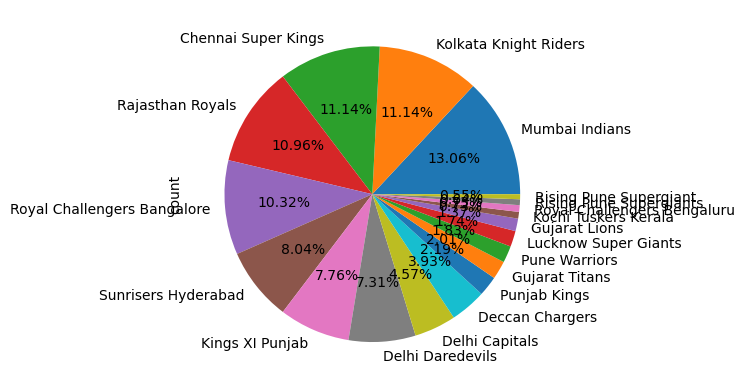

In [31]:
s = td.drop_duplicates('id')['toss_winner'].value_counts()
total_tosses = s.values.sum()
(s/total_tosses * 100).plot(kind='pie',autopct='%2.2f%%')

In [32]:
td.groupby(['id','batting_team'])['total_runs'].sum().nlargest(1)

id       batting_team       
1426268  Sunrisers Hyderabad    287
Name: total_runs, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'Mumbai Indians'),
  Text(1, 0, 'Chennai Super Kings'),
  Text(2, 0, 'Kolkata Knight Riders'),
  Text(3, 0, 'Royal Challengers Bangalore'),
  Text(4, 0, 'Rajasthan Royals'),
  Text(5, 0, 'Kings XI Punjab'),
  Text(6, 0, 'Sunrisers Hyderabad'),
  Text(7, 0, 'Delhi Daredevils'),
  Text(8, 0, 'Delhi Capitals'),
  Text(9, 0, 'Deccan Chargers'),
  Text(10, 0, 'Gujarat Titans'),
  Text(11, 0, 'Lucknow Super Giants'),
  Text(12, 0, 'Punjab Kings'),
  Text(13, 0, 'Gujarat Lions'),
  Text(14, 0, 'Pune Warriors'),
  Text(15, 0, 'Rising Pune Supergiant'),
  Text(16, 0, 'Royal Challengers Bengaluru'),
  Text(17, 0, 'Kochi Tuskers Kerala'),
  Text(18, 0, 'Rising Pune Supergiants')])

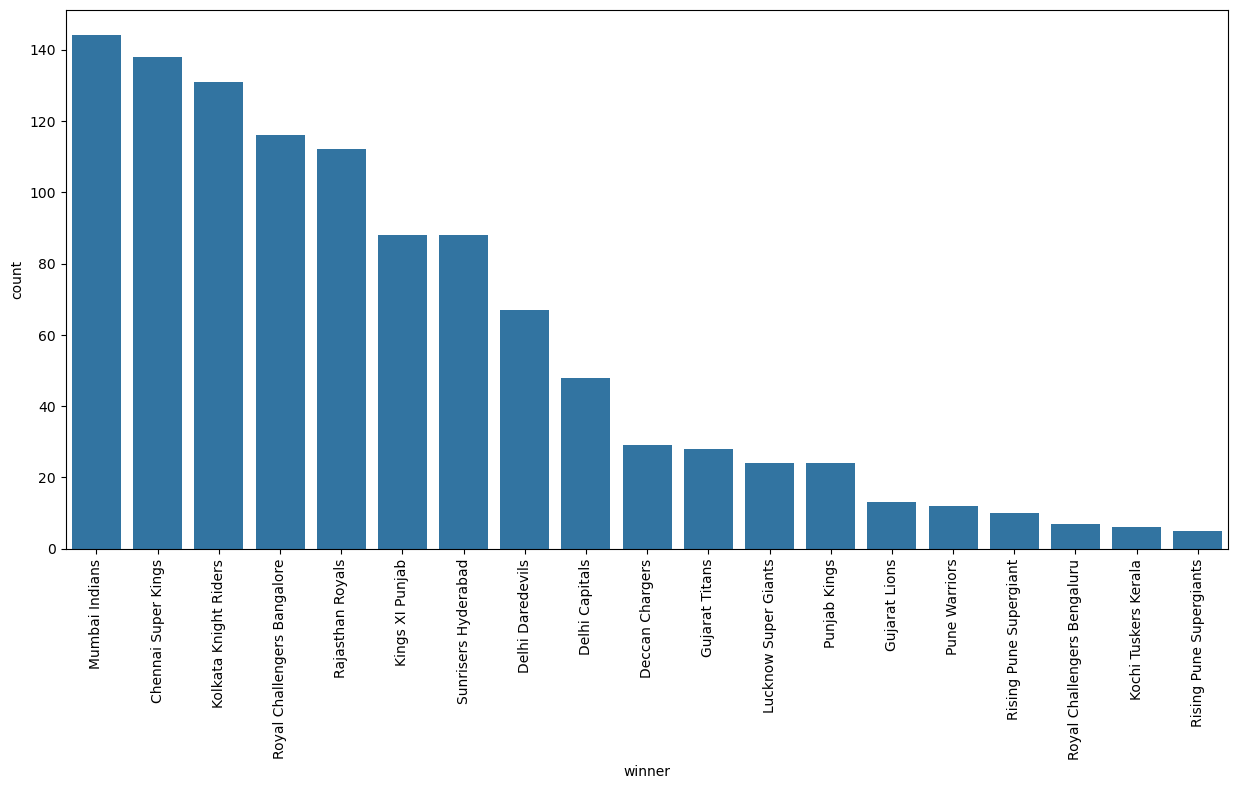

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.barplot(x=deli['winner'].value_counts().index, y=deli['winner'].value_counts())
plt.xticks(rotation=90)